In [4]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)

In [6]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))


  0%|          | 0/3750 [00:00<?, ?it/s]

Epoch 0



  0%|          | 1/3750 [00:00<36:31,  1.71it/s]

Loss: 2.3025271892547607



  4%|▍         | 154/3750 [01:25<34:23,  1.74it/s]


  8%|▊         | 301/3750 [02:51<31:00,  1.85it/s]

Loss: 1.696856141090393



 12%|█▏        | 452/3750 [04:15<29:50,  1.84it/s]


 16%|█▌        | 601/3750 [05:37<30:01,  1.75it/s]

Loss: 1.6071728467941284



 20%|██        | 752/3750 [07:02<27:07,  1.84it/s]


 24%|██▍       | 901/3750 [08:27<26:37,  1.78it/s]

Loss: 1.5074732303619385



 28%|██▊       | 1051/3750 [09:52<26:23,  1.70it/s]


 32%|███▏      | 1199/3750 [11:17<23:21,  1.82it/s]


 32%|███▏      | 1201/3750 [11:18<24:04,  1.76it/s]

Loss: 1.6593822240829468



 36%|███▌      | 1349/3750 [12:38<19:49,  2.02it/s]


 40%|███▉      | 1497/3750 [13:50<18:28,  2.03it/s]


 40%|████      | 1501/3750 [13:52<18:44,  2.00it/s]

Loss: 1.5306740999221802



 44%|████▍     | 1649/3750 [15:04<17:07,  2.04it/s]


 48%|████▊     | 1797/3750 [16:17<15:37,  2.08it/s]


 48%|████▊     | 1801/3750 [16:18<15:42,  2.07it/s]

Loss: 1.5746748447418213



 52%|█████▏    | 1949/3750 [17:30<14:50,  2.02it/s]


 56%|█████▌    | 2097/3750 [18:42<13:39,  2.02it/s]


 56%|█████▌    | 2101/3750 [18:44<13:36,  2.02it/s]

Loss: 1.5037150382995605



 60%|█████▉    | 2249/3750 [19:55<12:14,  2.04it/s]


 64%|██████▍   | 2397/3750 [21:20<16:02,  1.41it/s]


 64%|██████▍   | 2401/3750 [21:23<16:19,  1.38it/s]

Loss: 1.7162553071975708



 68%|██████▊   | 2549/3750 [23:16<15:35,  1.28it/s]


 72%|███████▏  | 2697/3750 [25:07<13:35,  1.29it/s]


 72%|███████▏  | 2701/3750 [25:10<12:46,  1.37it/s]

Loss: 1.5385923385620117



 76%|███████▌  | 2849/3750 [27:02<15:04,  1.00s/it]


 80%|███████▉  | 2997/3750 [28:56<08:55,  1.41it/s]


 80%|████████  | 3001/3750 [28:59<09:17,  1.34it/s]

Loss: 1.493953824043274



 84%|████████▍ | 3149/3750 [30:45<07:23,  1.36it/s]


 88%|████████▊ | 3297/3750 [32:29<05:27,  1.38it/s]


 88%|████████▊ | 3301/3750 [32:32<05:15,  1.42it/s]

Loss: 1.5112154483795166



 92%|█████████▏| 3449/3750 [34:18<03:18,  1.51it/s]


 96%|█████████▌| 3597/3750 [36:02<01:45,  1.45it/s]


 96%|█████████▌| 3601/3750 [36:05<01:49,  1.36it/s]

Loss: 1.5373334884643555



100%|█████████▉| 3749/3750 [37:52<00:00,  1.34it/s]


  0%|          | 0/3750 [00:00<?, ?it/s]

Epoch 1



  0%|          | 1/3750 [00:00<45:27,  1.37it/s]

Loss: 1.5308747291564941



  4%|▍         | 154/3750 [01:48<40:58,  1.46it/s]


  8%|▊         | 301/3750 [03:32<39:12,  1.47it/s]

Loss: 1.4967072010040283



 12%|█▏        | 452/3750 [05:17<42:27,  1.29it/s]


 16%|█▌        | 601/3750 [06:58<31:16,  1.68it/s]

Loss: 1.5445265769958496



 20%|██        | 752/3750 [08:22<26:42,  1.87it/s]


 24%|██▍       | 901/3750 [09:46<27:14,  1.74it/s]

Loss: 1.5843944549560547



 28%|██▊       | 1051/3750 [11:11<24:07,  1.86it/s]


 32%|███▏      | 1199/3750 [12:35<24:16,  1.75it/s]


 32%|███▏      | 1201/3750 [12:36<23:40,  1.79it/s]

Loss: 1.503883957862854



 36%|███▌      | 1349/3750 [13:59<22:56,  1.74it/s]


 40%|███▉      | 1497/3750 [15:23<21:20,  1.76it/s]


 40%|████      | 1501/3750 [15:25<20:35,  1.82it/s]

Loss: 1.498867154121399



 44%|████▍     | 1649/3750 [16:49<20:41,  1.69it/s]


 48%|████▊     | 1797/3750 [18:14<18:03,  1.80it/s]


 48%|████▊     | 1801/3750 [18:16<17:56,  1.81it/s]

Loss: 1.5447384119033813



 52%|█████▏    | 1949/3750 [19:39<14:38,  2.05it/s]


 56%|█████▌    | 2097/3750 [20:52<13:45,  2.00it/s]


 56%|█████▌    | 2101/3750 [20:54<13:20,  2.06it/s]

Loss: 1.4917643070220947



 60%|█████▉    | 2249/3750 [22:05<12:15,  2.04it/s]


 64%|██████▍   | 2397/3750 [23:17<10:47,  2.09it/s]


 64%|██████▍   | 2401/3750 [23:19<10:45,  2.09it/s]

Loss: 1.478511929512024



 68%|██████▊   | 2549/3750 [24:31<09:53,  2.03it/s]


 72%|███████▏  | 2697/3750 [25:43<08:38,  2.03it/s]


 72%|███████▏  | 2701/3750 [25:45<08:27,  2.07it/s]

Loss: 1.4704606533050537



 76%|███████▌  | 2849/3750 [26:58<07:20,  2.05it/s]


 80%|███████▉  | 2997/3750 [28:10<06:09,  2.04it/s]


 80%|████████  | 3001/3750 [28:12<06:07,  2.04it/s]

Loss: 1.4854068756103516



 84%|████████▍ | 3149/3750 [29:24<04:52,  2.05it/s]


 88%|████████▊ | 3297/3750 [30:37<03:40,  2.06it/s]


 88%|████████▊ | 3301/3750 [30:39<03:39,  2.04it/s]

Loss: 1.4652955532073975



 92%|█████████▏| 3449/3750 [31:51<02:26,  2.05it/s]


 96%|█████████▌| 3597/3750 [33:03<01:16,  2.01it/s]


 96%|█████████▌| 3601/3750 [33:05<01:11,  2.07it/s]

Loss: 1.5297222137451172



100%|█████████▉| 3749/3750 [34:17<00:00,  2.05it/s]


  0%|          | 0/3750 [00:00<?, ?it/s]

Epoch 2



  0%|          | 1/3750 [00:00<30:17,  2.06it/s]

Loss: 1.5240508317947388



  4%|▍         | 154/3750 [01:15<28:40,  2.09it/s]


  8%|▊         | 301/3750 [02:27<28:00,  2.05it/s]

Loss: 1.5258866548538208



 12%|█▏        | 452/3750 [03:41<26:39,  2.06it/s]


 16%|█▌        | 601/3750 [04:55<26:45,  1.96it/s]

Loss: 1.5162073373794556



 20%|██        | 752/3750 [06:09<24:42,  2.02it/s]


 24%|██▍       | 901/3750 [07:23<23:36,  2.01it/s]

Loss: 1.6079206466674805



 28%|██▊       | 1051/3750 [08:37<21:38,  2.08it/s]


 32%|███▏      | 1199/3750 [09:50<20:46,  2.05it/s]


 32%|███▏      | 1201/3750 [09:51<20:36,  2.06it/s]

Loss: 1.5436716079711914



 36%|███▌      | 1349/3750 [11:04<19:49,  2.02it/s]


 40%|███▉      | 1497/3750 [12:18<18:04,  2.08it/s]


 40%|████      | 1501/3750 [12:20<18:33,  2.02it/s]

Loss: 1.4750298261642456



 44%|████▍     | 1649/3750 [13:34<17:23,  2.01it/s]


 48%|████▊     | 1797/3750 [14:47<16:16,  2.00it/s]


 48%|████▊     | 1801/3750 [14:49<15:55,  2.04it/s]

Loss: 1.495794653892517



 52%|█████▏    | 1949/3750 [16:03<14:53,  2.02it/s]


 56%|█████▌    | 2097/3750 [17:17<13:08,  2.10it/s]


 56%|█████▌    | 2101/3750 [17:19<13:26,  2.05it/s]

Loss: 1.5256327390670776



 60%|█████▉    | 2249/3750 [18:32<12:41,  1.97it/s]


 64%|██████▍   | 2397/3750 [19:46<11:08,  2.02it/s]


 64%|██████▍   | 2401/3750 [19:48<11:03,  2.03it/s]

Loss: 1.6067968606948853



 68%|██████▊   | 2549/3750 [21:01<09:47,  2.04it/s]


 72%|███████▏  | 2697/3750 [22:15<08:41,  2.02it/s]


 72%|███████▏  | 2701/3750 [22:17<08:37,  2.03it/s]

Loss: 1.4665312767028809



 76%|███████▌  | 2849/3750 [23:30<07:15,  2.07it/s]


 80%|███████▉  | 2997/3750 [24:43<06:14,  2.01it/s]


 80%|████████  | 3001/3750 [24:45<06:10,  2.02it/s]

Loss: 1.5560986995697021



 84%|████████▍ | 3149/3750 [25:58<05:02,  1.99it/s]


 88%|████████▊ | 3297/3750 [27:12<03:48,  1.99it/s]


 88%|████████▊ | 3301/3750 [27:14<03:41,  2.02it/s]

Loss: 1.531528115272522



 92%|█████████▏| 3449/3750 [28:27<02:29,  2.01it/s]


 96%|█████████▌| 3597/3750 [29:40<01:14,  2.05it/s]


 96%|█████████▌| 3601/3750 [29:42<01:13,  2.03it/s]

Loss: 1.4621243476867676



100%|█████████▉| 3749/3750 [30:55<00:00,  2.04it/s]


  0%|          | 0/3750 [00:00<?, ?it/s]

Epoch 3



  0%|          | 1/3750 [00:00<30:19,  2.06it/s]

Loss: 1.4801994562149048



  4%|▍         | 154/3750 [01:16<29:27,  2.03it/s]


  8%|▊         | 301/3750 [02:28<28:30,  2.02it/s]

Loss: 1.534663200378418



 12%|█▏        | 452/3750 [03:43<27:04,  2.03it/s]


 16%|█▌        | 601/3750 [04:56<25:58,  2.02it/s]

Loss: 1.521365761756897



 20%|██        | 752/3750 [06:10<24:25,  2.05it/s]


 24%|██▍       | 901/3750 [07:24<23:15,  2.04it/s]

Loss: 1.4646564722061157



 28%|██▊       | 1051/3750 [08:38<22:15,  2.02it/s]


 32%|███▏      | 1199/3750 [09:51<20:54,  2.03it/s]


 32%|███▏      | 1201/3750 [09:52<20:43,  2.05it/s]

Loss: 1.4827851057052612



 36%|███▌      | 1349/3750 [11:04<19:45,  2.03it/s]


 40%|███▉      | 1497/3750 [12:17<18:23,  2.04it/s]


 40%|████      | 1501/3750 [12:19<18:24,  2.04it/s]

Loss: 1.4621057510375977



 44%|████▍     | 1649/3750 [13:33<18:43,  1.87it/s]


 48%|████▊     | 1797/3750 [14:46<16:11,  2.01it/s]


 48%|████▊     | 1801/3750 [14:48<16:24,  1.98it/s]

Loss: 1.4612566232681274



 52%|█████▏    | 1949/3750 [16:00<14:55,  2.01it/s]


 56%|█████▌    | 2097/3750 [17:13<13:30,  2.04it/s]


 56%|█████▌    | 2101/3750 [17:15<13:35,  2.02it/s]

Loss: 1.473637580871582



 60%|█████▉    | 2249/3750 [18:28<12:29,  2.00it/s]


 64%|██████▍   | 2397/3750 [19:41<10:52,  2.07it/s]


 64%|██████▍   | 2401/3750 [19:43<10:38,  2.11it/s]

Loss: 1.4781570434570312



 68%|██████▊   | 2549/3750 [20:56<10:05,  1.98it/s]


 72%|███████▏  | 2697/3750 [22:09<08:46,  2.00it/s]


 72%|███████▏  | 2701/3750 [22:11<08:40,  2.01it/s]

Loss: 1.461463451385498



 76%|███████▌  | 2849/3750 [23:24<07:24,  2.03it/s]


 80%|███████▉  | 2997/3750 [24:38<06:11,  2.03it/s]


 80%|████████  | 3001/3750 [24:40<06:10,  2.02it/s]

Loss: 1.530714511871338



 84%|████████▍ | 3149/3750 [25:52<04:55,  2.03it/s]


 88%|████████▊ | 3297/3750 [27:05<03:47,  1.99it/s]


 88%|████████▊ | 3301/3750 [27:07<03:39,  2.04it/s]

Loss: 1.481744647026062



 92%|█████████▏| 3449/3750 [28:19<02:25,  2.07it/s]


 96%|█████████▌| 3597/3750 [29:32<01:14,  2.05it/s]


 96%|█████████▌| 3601/3750 [29:33<01:13,  2.02it/s]

Loss: 1.475748896598816



100%|█████████▉| 3749/3750 [30:46<00:00,  2.06it/s]


  0%|          | 0/3750 [00:00<?, ?it/s]

Epoch 4



  0%|          | 1/3750 [00:00<30:41,  2.04it/s]

Loss: 1.4716976881027222



  4%|▍         | 154/3750 [01:15<29:27,  2.03it/s]


  8%|▊         | 301/3750 [02:27<28:34,  2.01it/s]

Loss: 1.488785982131958



 12%|█▏        | 452/3750 [03:41<26:34,  2.07it/s]


 16%|█▌        | 601/3750 [04:54<25:57,  2.02it/s]

Loss: 1.4687743186950684



 20%|██        | 752/3750 [06:09<24:48,  2.01it/s]


 24%|██▍       | 901/3750 [07:23<23:28,  2.02it/s]

Loss: 1.4889837503433228



 28%|██▊       | 1051/3750 [08:37<22:30,  2.00it/s]


 32%|███▏      | 1199/3750 [09:50<20:41,  2.06it/s]


 32%|███▏      | 1201/3750 [09:51<20:48,  2.04it/s]

Loss: 1.542616844177246



 36%|███▌      | 1349/3750 [11:04<19:31,  2.05it/s]


 40%|███▉      | 1497/3750 [12:16<18:27,  2.03it/s]


 40%|████      | 1501/3750 [12:18<18:06,  2.07it/s]

Loss: 1.5181968212127686



 44%|████▍     | 1649/3750 [13:31<17:10,  2.04it/s]


 48%|████▊     | 1797/3750 [14:43<15:40,  2.08it/s]


 48%|████▊     | 1801/3750 [14:44<15:17,  2.13it/s]

Loss: 1.4810031652450562



 52%|█████▏    | 1949/3750 [15:57<14:54,  2.01it/s]


 56%|█████▌    | 2097/3750 [17:09<13:31,  2.04it/s]


 56%|█████▌    | 2101/3750 [17:11<13:26,  2.04it/s]

Loss: 1.465714693069458



 60%|█████▉    | 2249/3750 [18:23<12:09,  2.06it/s]


 64%|██████▍   | 2397/3750 [19:36<11:01,  2.05it/s]


 64%|██████▍   | 2401/3750 [19:38<11:02,  2.04it/s]

Loss: 1.4802436828613281



 68%|██████▊   | 2549/3750 [20:49<09:58,  2.01it/s]


 72%|███████▏  | 2697/3750 [22:02<08:28,  2.07it/s]


 72%|███████▏  | 2701/3750 [22:04<08:26,  2.07it/s]

Loss: 1.5701204538345337



 76%|███████▌  | 2849/3750 [23:16<07:19,  2.05it/s]


 80%|███████▉  | 2997/3750 [24:29<06:09,  2.04it/s]


 80%|████████  | 3001/3750 [24:31<06:06,  2.05it/s]

Loss: 1.5212531089782715



 84%|████████▍ | 3149/3750 [25:43<04:50,  2.07it/s]


 88%|████████▊ | 3297/3750 [26:55<03:42,  2.04it/s]


 88%|████████▊ | 3301/3750 [26:57<03:40,  2.03it/s]

Loss: 1.4751477241516113



 92%|█████████▏| 3449/3750 [28:09<02:26,  2.05it/s]


 96%|█████████▌| 3597/3750 [29:21<01:14,  2.04it/s]


 96%|█████████▌| 3601/3750 [29:23<01:12,  2.05it/s]

Loss: 1.4697704315185547



100%|█████████▉| 3749/3750 [30:36<00:00,  1.98it/s]


Test:  38%|███▊      | 240/625 [00:23<00:37, 10.38it/s]


Test:  80%|███████▉  | 497/625 [00:49<00:12, 10.07it/s]


Test: 100%|██████████| 625/625 [01:01<00:00, 10.33it/s]

Accuracy: 97.9800033569336


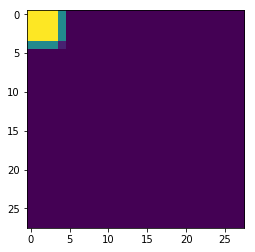

tensor(3)


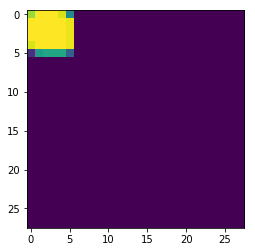

tensor(3)


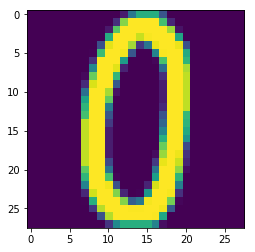

tensor(9)


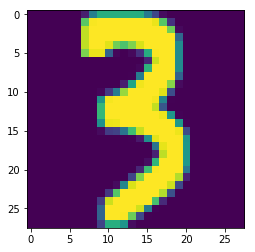

tensor(3)


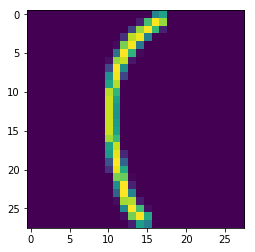

tensor(6)


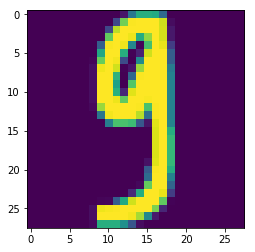

tensor(9)


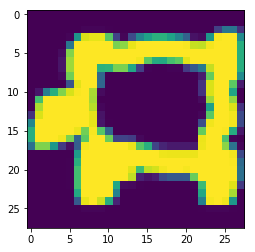

tensor(2)


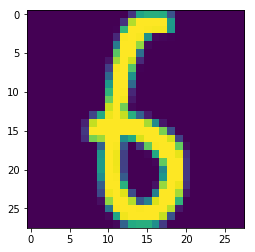

tensor(6)


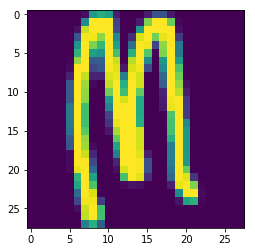

tensor(9)


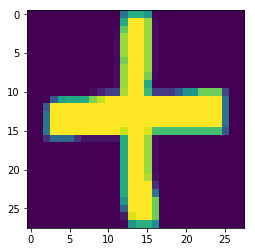

tensor(8)


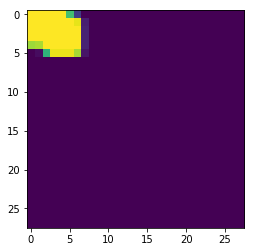

tensor(3)


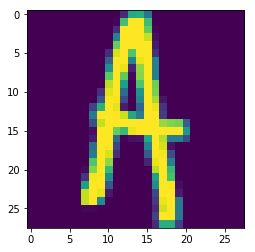

tensor(9)


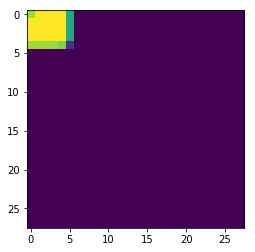

tensor(3)


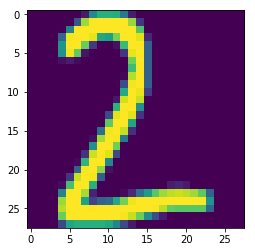

tensor(2)


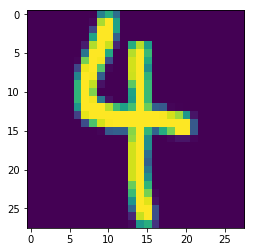

tensor(8)


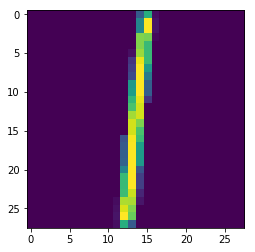

tensor(1)


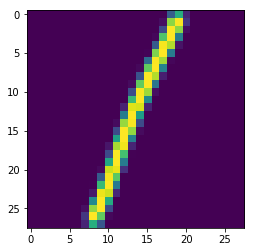

tensor(1)


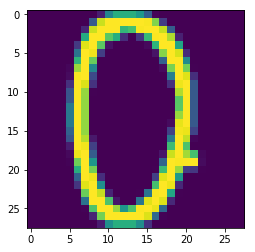

tensor(0)


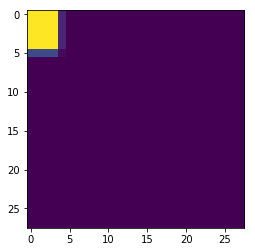

tensor(3)


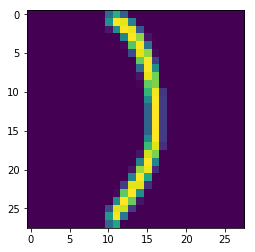

tensor(1)


In [9]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1